<a href="https://colab.research.google.com/github/unknown-jun/NLP_study/blob/main/NLP_Book/B11_tokenizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 토큰화란?
- 토큰화(tokenization)란 문장을 토큰 시퀀스로 나누는 과정을 뜻함
- 수행 대상에 따라 문자, 단어, 서브워드 등 세 가지 방식이 있다.
- 토큰화를 수행하는 프로그램을 토크나이저(tokenizer)라고 한다.
- 대표적인 한국어 토크나이저로는 은전한닢(mecab), 꼬꼬마(kkma)가 있다.
- 이 토크나이저는 토큰화 뿐만이 아니라 품사 부착(Part-Of-Speech tagging)까지 수행이 가능하다.

## 단어 단위 토큰화
- 단어 단위 토큰화의 가장 쉬운 방법은 '공백'을 기준으로 나누는 것이다.
- 공백을 기준으로 토큰화를 할 시에 별도의 토크나이저를 쓰지 않아도 된다는 장점이 있다.
- 그러나 어휘 집합(vocabulary)의 크기가 매우 커질 수 있다.
  - '갔었어', '갔었는데요', '갔었습니다', '갔다' 처럼 표현이 살짝만 바뀌어도 모든 경우의 수가 어휘 집합에 포함되기 때문
- 만약 학습된 토크나이저를 사용한다면 어휘 집합의 크기가 커지는 것을 완화할 수 있지만 그 수가 지나치게 커지는 것을 막을 수 없다.
- 어휘 집합의 크기가 커지면 그만큼 모델 학습이 어려워질 수 있다.


## 문자 단위 토큰화
- 토큰화를 단어 대신 문자 단위로 토큰화를 진행할 시에 어휘 집합의 크기가 상대적으로 작다는 장점이 존재한다.(한글의 경우: 1만 172개)
- 더불어 해당 언어의 모든 문자를 어휘 집합에 포함하므로 UNK 토큰 문제로부터 자유롭다.
- 하지만 각 문자 토큰의 의미를 파악하지 못한다.
  - 예를 들어 어제의 어와 어미(語尾) 어의 구분이 사라진다.
- 게다가 언어 모델에 입력할 토큰 시퀀스가 길어져 모델의 성능이 떨어질 수 있다.

## 서브워드 단위 토큰화
- 서브워드(subword)단위 토큰화는 단어와 문자 단위 토큰화의 중간에 있는 형태다
- 어휘 집합의 크기가 지나치게 커지지 않으면서 UNK 토큰의 문제를 피하고, 분석된 시퀀스가 길어지지 않도록 한다.
- 대표적인 기법으로 바이트 페어 인코딩이 있다.

## 바이트 페어 인코딩
바이트 페어 인코딩(Byte Pair Encoding: BPE)은 정보를 압축하는 알고리즘으로 처음 제안되었지만, 최근 들어 자연어 처리 모델에 널리 쓰이는 토큰화 기법이다. GPT 모델은 BPE기법으로 토큰화를 수행하며, BERT 모델은 BPE와 유사한 워드피스(WordPiece)를 토크나이저로 사용한다. 

### BPE의 작동 원리
BPE는 정보 압축 알고리즘으로, 데이터에서 가장 많이 등장한 문자열을 병합해서 데이터를 압축하는 기법이다. 예를 들어 다음과 같은 데이터가 있다고 가정해보자.

**<div align="center">aaabdaaabac</div>**

BPE는 데이터에 등장할 글자(a, b, c, d)를 초기 사전으로 구성하며, 연속된 두 글자를 한 글자로 병합한다. 이 문자열에선 aa가 가장 많이 나왔으므로 이를 Z로 병합하면 다음과 같이 압축 가능하다.

**<div align="center"><span style="color: 2D3748; background-color:#fff5b1;">Z</span>abd<span style="color: 2D3748; background-color:#fff5b1;">Z</span>abac</div>**

이 문자열에서 ab가 가장 많이 나왔으므로 이를 Y로 병합할 수 있다.

**<div align="center">Z<span style="color: 2D3748; background-color:#fff5b1;">Y</span>dZ<span style="color: 2D3748; background-color:#fff5b1;">Y</span>ac</div>**

이를 다시 ZY를 X로 병합이 가능하다. 즉, 이미 병합된 문자열 역시 한 번 더 병합할 수 있다.

**<div align="center"><span style="color: 2D3748; background-color:#fff5b1;">X</span>d<span style="color: 2D3748; background-color:#fff5b1;">X</span>ac</div>**


BPE 수행 이전에는 원 데이터를 표현하기 위한 사전 크기가 4개(a, b, c, d)였지만 수행 이후엔 7개(a, b, c, d, Z, Y, X)로 늘었다. 그렇지만 데이터의 길이는 11에서 5개로 줄었다. 이처럼 BPE는 사전의 크기를 지나치게 늘리지 않으면서도 데이터 길이를 효율적으로 압축할 수 있게 한다.

BPE를 활용한 토큰화 절차는 다음과 같다.
1. <span style="color: 2D3748; background-color:#fff5b1;">어휘 집합 구축</span>: 자주 등장하는 문자열을 병합하고 이를 어휘 집합에 추가한다. 이를 원하는 집합 크기가 될 때까지 반복한다.
2. <span style="color: 2D3748; background-color:#fff5b1;">토큰화</span>: 토큰화 대상 문장의 각 어절에서 어휘 집합에 있는 서브워드가 포함되었을 때 해당 서브워드를 어절에서 분리한다.


### BPE 어휘 집합 구축하기

<span style="color: 2D3748; background-color:#fff5b1;"> BPE 어휘 집합은 고빈도 바이그램 쌍을 병합하는 방식으로 구축한다.</span>

BPE 어휘 집합을 만들기 위해선 우선 말뭉치가 필요하다. 말뭉치의 모든 문장을 공백이나 다른 기준으로 미리 나누어 주는데 이를 pre-tokenize라고 한다.

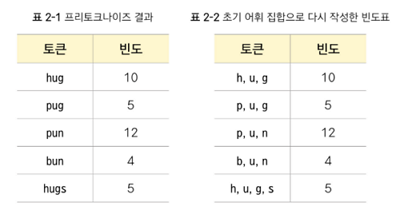

예를 들어 어떠한 말뭉치에 pre-tokenize를 실시하고 그 빈도를 세어보니 표 2-1을 얻었다고 가정하자. BPE를 문자 단위로 수행한다면 초기의 어휘 집합은 다음과 같다.
> b, g, h, n, p, s, u

이 7개 문자로도 모든 토큰을 표현할 수 있지만 어휘 집합의 크기가 약간 커지더라도 토큰 시퀀스의 길이를 줄이려는(정보를 압축하려는) 목적이기 때문에 BPE를 수행할 예정이다.

표 2-3이 토큰을 2개(바이그램;bigram)씩 묶어서 나열한 것이다. 이를 바이그램 쌍이 같은 것끼리 그 빈도를 합쳐주자. 그 결과가 표 2-4다.

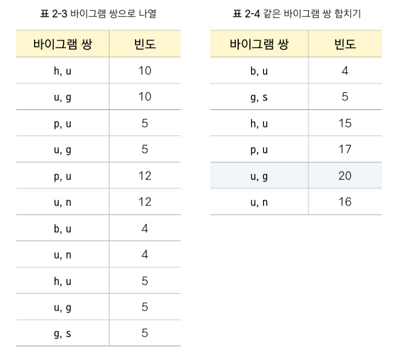

이번에 가장 많이 등장한 바이그램 쌍은 u,g로 총 20회다. 따라서 u와 g를 합친 ug를 어휘 집합에 추가한다. 그러면 다음과 같다.

> b, g, h, n, p, s, u, ug

표 2-5를 보면 u와 g를 병합했으므로 표 2-2의 각 빈도는 그대로인채 ① h,u,g가 h,ug로 ② p,u,g가 p,ug로 ③ h,u,g,s가 h,ug,s로 바뀌었다. 그리고 표 2-6은 표 2-5를 바이그램 쌍 빈도로 나타낸 결과다.

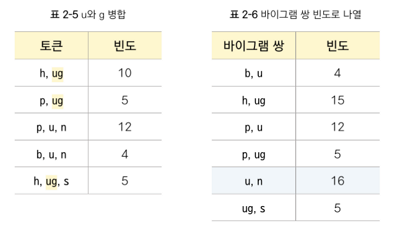

이번에 가장 많이 등장한 바이그램 쌍은 u,n으로 총 16회다. 따라서 u와 n을 합친 un을 어휘집합에 추가한다. 그 결과는 다음과 같다.
> b, g, h, n, p, s, u, ug, un

표 2-7은 표 2-5를 새로운 어휘 집합에 맞게 다시 쓴 결과이고 표 2-8은 표 2-7을 바탕으로 바이그램 쌍 빈도를 나타낸 결과다.
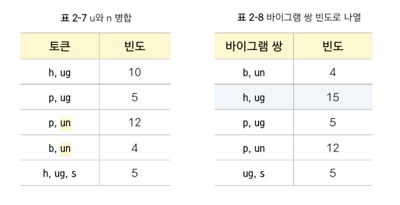

이번에 가장 많이 등장한 바이그램 쌍은 h, ug로 총 15회이다. 따라서 h와 ug를 합친 hug를 어휘 집합에 추가한다. 다음은 BPE 사전 집합 크기를 10개로 정했을 때의 최종 결과값이다.
> b, g, h, n, p, s, u, ug, un, hug

만약 허깅페이스(hugging face) tokenizer 패키지를 활용하여 위의 결과를 얻었다면 이는 vocab.json 파일에 저장된다.

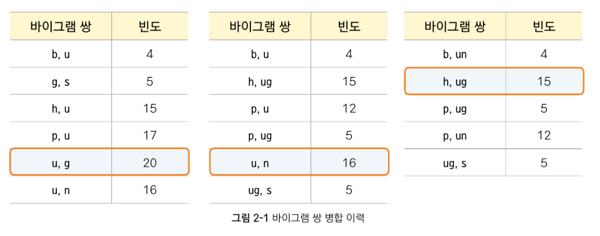

허깅페이스는 서브워드 병합 우선순위를 그림 2-1처럼 만들어 이를 참고하도록 merge.txt파일로 만들어 저장한다.  
병합 우선 순위: merge.txt  
>u g  
u n  
u ng  

### BPE 토큰화
어휘집합(vocab.json)과 병합 우선순위(merge.txt)가 있으면 토큰화가 가능하다. 예를 들어 pug bug mug라는 문장을 토큰화한다고 가정하자. 이 문장에서 공백을 기준으로 하는 pre-tokenize를 수행하면 다음과 같은 결과를 얻을 수 있다.

> pug bug mug → pug, bug, mug

이 토큰을 가지고 각각 BPE 토큰화를 수행한다. 가장 먼저 토큰화를 할 대상은 pug다. 그 전체적인 과정은 다음과 같다.  

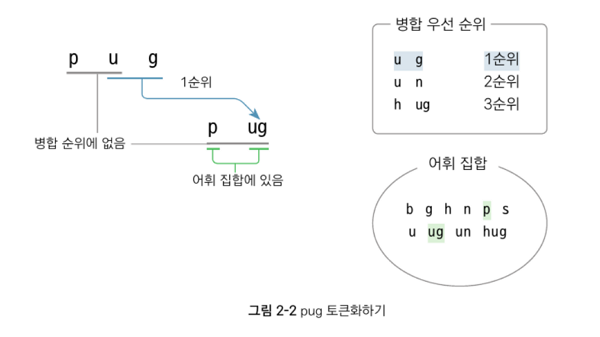

우선 pug를 다음처럼 문자 단위로 분리한다.
> pug → p, u, g

이후 merge.txt를 참고해 병합 우선순위를 부여한다.
> p, u → 우선순위 없음  
u, g → 1순위

둘 중에 u와 g의 우선순위가 높으므로 이들을 먼저 합쳐준다. 그러면 다음과 같다.
> p,u,g → p,ug

merge.txt를 한번 더 참고해 병합 우선순위를 부여한다.
> p,ug → 우선순위 없음

더 이상 병합 대상이 없으므로 병합을 그만한다. 그다음으로는 p,ug가 각각 어휘 집합(vocab.json)에 있는지를 검사한다. 둘 모두 있으므로 pug의 토큰화 최종 결과는 p,ug다. bug 또한 토큰화 결과 b,ug가 된다. 

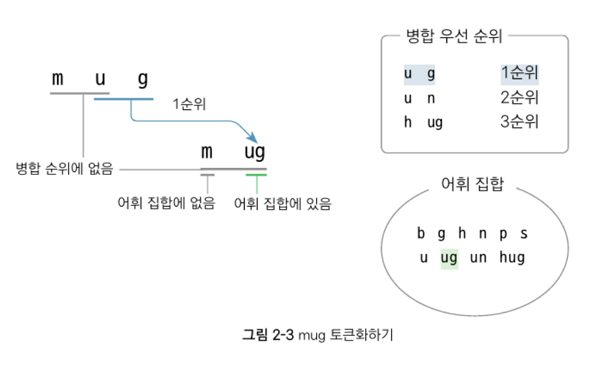

mug는 merge.txt를 참고하여 병합 우선순위를 따져보면 ug를 먼저 합치게 된다. 따라서 병합 결과 m, ug인데 m은 어휘 집합에 없으므로 최종 토큰화 결과는 \<unk\>, ug가 된다. 최종 결과는 다음과 같다.
> pug bug mug → p,ug, b, ug, \<unk\>, ug



## 워드피스
워드피스(Wordpiece)는 말뭉치에서 자주 등장한 문자열을 토큰으로 인식한다는 점에서 BPE와 본질적으로 유사하다. 다만 어휘 집합을 구축할 때 문자열을 병합하는 기준이 다르다. 워드피스는 BPE처럼 단순히 빈도를 기준으로 병합하는 것이 아니라, 병합했을 때 말뭉치의 우도(likelihood)를 가장 높이는 쌍을 병합한다.  

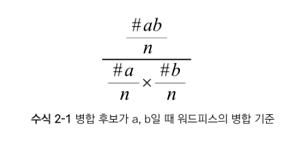

위의 식은 병합 후보가 a, b일 때 판단의 근거가 되는 값을 계산하는 방법이다. 
- 다음 식에서 $\#a$, $\#b$, $\#ab$는 각각 a, b, ab라는 문자열의 빈도수, $n$은 전체 글자 수를 가리킨다. 
- 즉, 분자는 ab가 연달아 등장할 확률, 분모는 a, b가 각각 등장할 확률의 곱이다.
- a와 b가 서로 독립임을 가정했을 때보다 둘이 자주 동시에 등장해야 위 식의 값이 커진다.
- 즉, 워드피스에서는 병합 후보에 오른 쌍을 미리 병합해 보고 잃는 것과 가치 등을 판단한 후에 병합한다.
- 워드 피스는 병합 대상 전체 후보들 가운데 위와 같이 계산한 값이 가장 높은 쌍을 합친다.  

허깅페이스 tokenizer를 사용한다면 토큰화를 수행하는 방식도 BPE와 워드피스가 약간 다르다. BPE는 어절별로 병합 우선순위(merge.txt)가 높은 바이그램 쌍을 반복해서 병합한다. 그다음에 병합된 토큰이 어휘 집합(vocab.json)에 있는지 확인해 최종결과를 도출한다.  

그런데 워드피스는 어휘 집합(vocab.json)만 가지고 토큰화를 진행한다. 워드피스에서는 분석 대상 어절에 어휘 집합에 있는 서브워드가 포함돼 있을 때 해당 서브워드를 어절에서 분리한다. 단, 이러한 서브워드 후보가 여럿 있을 경우 가장 긴 서브워드를 선택한다. 이후 어절의 나머지에서 어휘 집합에 있는 서브워드를 다시 찾고(최장 일치 기준), 또 분리한다. 분석 대상 문자열에서 서브워드 후보가 하나도 없으면 해당 문자열 전체를 미등록 단어로 추가한다.

## 어휘 집합 구축하기

In [ ]:
!pip install ratsnlp

In [ ]:
from Korpora import Korpora
nsmc = Korpora.load('nsmc', force_download=True)

In [3]:
# NSMC 전처리
import os

def write_lines(path, lines):
  with open(path, 'w', encoding='utf-8') as f:
    for line in lines:
      f.write(f'{line}\n')

write_lines('/content/train.txt', nsmc.train.get_all_texts())
write_lines('/content/text.txt', nsmc.test.get_all_texts())

GPT 계열 모델이 사용하는 토크나이저 기법은 BPE이다. 단, 앞절에서 설명한 문자 단위가 아니라 유니코드 바이트 수준으로 어휘 집합을 구축하고 토큰화를 수행한다. 전 세계 대부분의 글자가 유니코드로 표현할 수 있으므로 유니코드 바이트 기준 BPE를 사용하면 미등록 토큰 문제에서 자유롭다.

In [4]:
import os
os.makedirs("/content/bbpe", exist_ok=True)

In [6]:
# 바이트 수준 BPE 어휘 집합 구축
from tokenizers import ByteLevelBPETokenizer
bytebpe_tokenizer = ByteLevelBPETokenizer()
bytebpe_tokenizer.train(
    files=['/content/text.txt', '/content/train.txt'],
    vocab_size=10000,
    special_tokens=["[PAD]"]
)
bytebpe_tokenizer.save_model('/content/bbpe')

['/content/bbpe/vocab.json', '/content/bbpe/merges.txt']

BERT는 워드피스 토크나이저를 사용한다.

In [7]:
os.makedirs("/content/wordpiece", exist_ok=True)

In [8]:
from tokenizers import BertWordPieceTokenizer

wordpiece_tokenizer = BertWordPieceTokenizer(lowercase=False)
wordpiece_tokenizer.train(
    files=['/content/text.txt', '/content/train.txt'],
    vocab_size=10000,
)
wordpiece_tokenizer.save_model('/content/wordpiece')

['/content/wordpiece/vocab.txt']

## 토큰화 하기

In [11]:
# GPT 토크나이저 선언
from transformers import GPT2Tokenizer
tokenizer_gpt = GPT2Tokenizer.from_pretrained('/content/bbpe')
tokenizer_gpt.pad_token = '[PAD]'

file /content/bbpe/config.json not found


In [13]:
# GPT 토크나이저로 토큰화하기
sentences = ['아 더빙.. 진짜 짜증나네요 목소리',
            '흠...포스터보고 초딩영화줄...오버연기조차 가볍지 않구나', 
            '별루 였다...']
tokenized_sentence = [tokenizer_gpt.tokenize(sentence) for sentence in sentences]

In [15]:
# GPT 모델 입력 만들기
batch_inputs = tokenizer_gpt(
    sentences, 
    padding='max_length',
    max_length=12,
    truncation=True,
)

위의 코드의 결과로 input_ids와 attention_mask값이 생긴다. input_ids는 토큰화 결과를 가지고 각 토큰을 인덱스로 바꾼 것이다. 어휘 집합(vocab.json)을 확인해보면 각 어휘 순서대로 나열되어 있는데 그 순서가 인덱스를 뜻한다. 이처럼 각 토큰을 인덱스로 변환하는 과정을 인덱싱(indexing)이라 한다.  

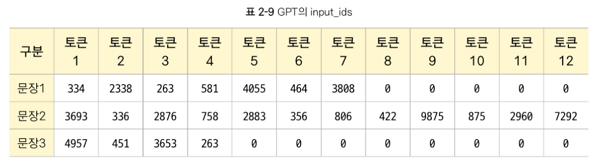

위의 표를 보면 모든 문장의 길이(토큰 수)가 12로 맞추어져 있는 것을 볼 수 있다. max_lenght를 12로 넣었기 때문이다. 이보다 짧은 문장 뒤에는 [PAD]에 해당하는 인덱스 0이 붙었다. [PAD]는 일종의 더미 토큰으로 길이를 맞추어주는 역할을 한다. 문장2의 경우 원래 토큰의 길이가 15였는데 12로 줄었는데 이는 truncation=True 옵션 때문이다.

attention_mask는 일반토큰(1)과 패딩토큰(0)이 자리한 곳을 구분해 놓은 장치다.

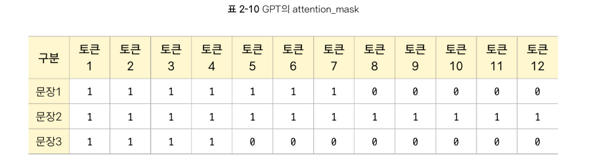

In [16]:
batch_inputs

{'input_ids': [[334, 2338, 263, 581, 4055, 464, 3808, 0, 0, 0, 0, 0], [3693, 336, 2876, 758, 2883, 356, 806, 336, 9875, 875, 2960, 7292], [4957, 451, 3653, 336, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]}

In [17]:
# BERT 토크나이저 선언
from transformers import BertTokenizer
tokenizer_bert = BertTokenizer.from_pretrained(
    '/content/wordpiece/vocab.txt',
    do_lower_case=False
)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1643: FutureWarning: Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated and won't be possible anymore in v5. Use a model identifier or the path to a directory instead.
  FutureWarning,


In [18]:
# BERT 토크나이저로 토큰화하기
sentences = ['아 더빙.. 진짜 짜증나네요 목소리',
            '흠...포스터보고 초딩영화줄...오버연기조차 가볍지 않구나', 
            '별루 였다...']
tokenized_sentence = [tokenizer_bert.tokenize(sentence) for sentence in sentences]

In [20]:
tokenized_sentence

[['아', '더빙', '.', '.', '진짜', '짜증나', '##네요', '목소리'],
 ['흠',
  '.',
  '.',
  '.',
  '포스터',
  '##보고',
  '초딩',
  '##영화',
  '##줄',
  '.',
  '.',
  '.',
  '오버',
  '##연기',
  '##조차',
  '가볍',
  '##지',
  '않',
  '##구나'],
 ['별루', '였다', '.', '.', '.']]

In [21]:
# BERT 모델 입력 만들기
batch_inputs = tokenizer_bert(
    sentences, 
    padding='max_length',
    max_length=12,
    truncation=True,
)

batch_inputs은 3가지 입력값이 생성된다. 하나는 GPT 모델과 마찬가지로 토큰 인덱스 시퀀스를 나타내는 input_ids다. 이를 표로 표현하면 다음과 같다.

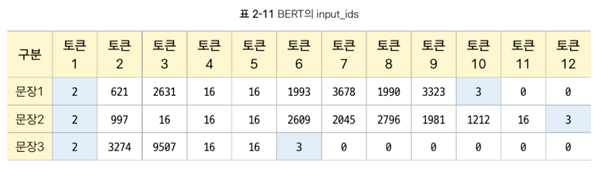

모든 문장 앞에 2, 끝에 3이 붙은 것을 볼 수 있는데 이는 각각 [CLS], [SEP]라는 토큰에 대응하는 인덱스이다. BERT는 문장 시작과 끝에 이 2개의 토큰을 덧붙이는 특징이 있다. 그리고 attention_mask도 만들어지는데 이 역시 GPT와 마찬가지로 일반 토큰이 자리한 곳(1), 패딩 토큰이 자리한 곳(0)을 구분해서 알려준다.

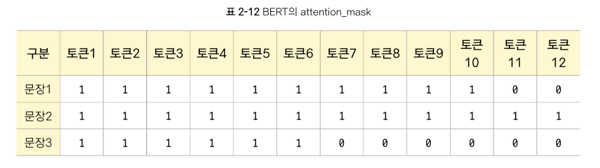

마지막으로 token_type_ids라는 입력값도 만들어진다. 이는 세그먼트(segment)에 해당되는 것으로 모두 0이다. 세그먼트 정보를 입력하는 것은 BERT 모델의 특징이다. BERT 모델은 기본적으로 문서(혹은 문장) 2개를 입력받는데, 둘은 token_type_ids로 구분한다. 첫 번째 세그먼트(문서 혹은 문장)은 0으로 두 번째 세그먼트는 1로 표현된다.

In [22]:
batch_inputs

{'input_ids': [[2, 621, 2631, 16, 16, 1993, 3678, 1990, 3323, 3, 0, 0], [2, 997, 16, 16, 16, 2609, 2045, 2796, 1981, 1351, 16, 3], [2, 3274, 9507, 16, 16, 16, 3, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]]}